In [1]:
import os
import numpy as np
import cv2

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

from config import *

K.set_image_data_format('channels_last')  # TF dimension ordering in this code


Using TensorFlow backend.


In [2]:
def get_train_sets(image_dir=TRAIN_DIR):  
    print("\nArchived data set found.")
    print("... loading {}".format(TRAIN_SET_PICKLE))
    t_set = np.load(TRAIN_SET_PICKLE)
    t_x = t_set['x']
    t_y = t_set['y']
        
    return t_x, t_y,

In [3]:
X, y = get_train_sets()
X = X[0:10,...]
y = y[0:10,...]


Archived data set found.
... loading data/train_set.npz


In [4]:
y.shape, y.dtype, y.min(), y.max()

((10, 96, 128), dtype('float32'), 0.0, 1.0)

In [5]:
X.shape, X.dtype, X.min(), X.max()

((10, 96, 128, 1), dtype('float32'), -1.8665071, 2.8803892)

In [6]:
def imageGen(X, y, batch_size=32, seed=1):
    # Change label dimension to rank 3 for processing
    y = y[..., None]
        
    # Create two instances with the same arguments
    data_gen_args = dict(rotation_range=30.,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,
                         vertical_flip=True,
                         fill_mode='constant',
                         cval=0)
    
    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    # Provide the same seed and keyword arguments to the fit and flow methods
    image_generator = image_datagen.flow(x=X, y=None, seed=seed, batch_size=batch_size)
    mask_generator = mask_datagen.flow(x=y, y=None, seed=seed, batch_size=batch_size)

    # combine generators into one which yields image and masks
    def generator():
        for x_o, y_o in zip(image_generator, mask_generator):
            if (x_o.shape[0]) < batch_size:
                continue
            yield x_o, np.squeeze(y_o, axis=3)
    
    return generator()

In [7]:
gen = imageGen(X, y, batch_size=3)

In [8]:
def plot_img(img, ax, fname=None, cmap='gray'):
    if len(img.shape) > 2:
        plot = ax.imshow(img)
    else:
        plot = ax.imshow(img, cmap=cmap)
    if fname is not None: ax.set_title(fname)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return plot

In [9]:
def show_masks(img, mask):
    kernel = np.ones((1,1),np.uint8)
    cols = 3
    rows = 1
    
    fig = plt.figure(figsize=(10, 1.7 * rows))
    
    img = (img - img.min()) / (img.max() - img.min())
    img = (img * 255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    print("Image shape: ", img.shape)

    mask = mask.astype(np.uint8)
    print("Mask shape:", mask.shape)
    # Highlight mask
    img[:,:,0] *= np.logical_not(mask)

    # Outline mask
    edges = cv2.Canny(mask * 255, 100, 200)
    dilated = cv2.dilate(edges, kernel, iterations = 1) > 0
    img[dilated, 0]= 0
    img[dilated, 1]= 255
    img[dilated, 2]= 255

    plot_img(img,
             fig.add_subplot(rows, cols, 0 + 1),
             None)
    
    fig.tight_layout()
    plt.show()

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


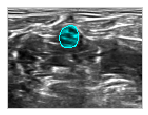

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


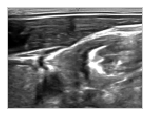

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


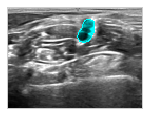

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


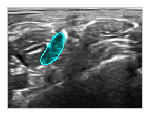

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


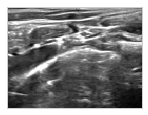

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


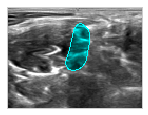

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


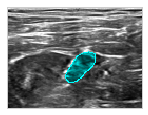

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


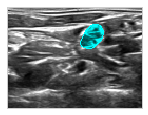

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


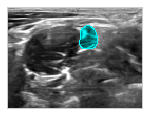

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


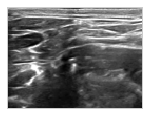

In [10]:
for i in range(y.shape[0]):
    show_masks(X[i],y[i])

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


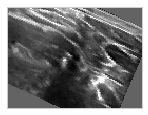

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


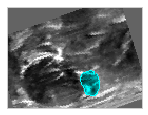

Image shape:  (96, 128, 3)
Mask shape: (96, 128)


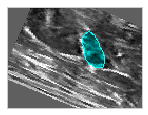

In [25]:
x0, y0 = next(gen)
for i in range(y0.shape[0]):
#     print(x0[i].shape, y0[i].shape)
    show_masks(x0[i], y0[i])

In [1]:
import numpy as np

In [39]:
a = np.array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]).reshape(-1, 2, 3, 1)
a.sum(axis=tuple(range(1, len(a.shape))))

array([21, 21])

In [52]:
import glob, os
from config import *

In [54]:
prefix_len = len(os.path.join(TEST_SRC, ''))
imgs = glob.glob(os.path.join(TEST_SRC, "*.tif"))
for img in imgs:
    print(img)
    print(os.path.join(TEST_DIR, img[prefix_len:]))
    break

data/test/943.tif
data/test_xs96/943.tif


In [59]:
def sratch(dst_dir="data/test_xs96"):
    prefix_len = len(os.path.join(dst_dir, ''))
    imgs = glob.glob(os.path.join(dst_dir, "*.tif"))
    img_keys = [img[prefix_len:img.rindex('.')] for img in imgs]
    img_keys = sorted(img_keys, key = lambda i: int(i))
    return img_keys
len(sratch())

5508